# User Knowledge Modeling Data Analysis: Group007 Project Report

# Introduction:

Electrical Direct Current Machines (DC) are machines that convert electrical energy into mechanical energy. The User Knowledge Modeling Data Set describes the students' knowledge level on the subject of Electrical DC Machines. They are important as they are used in common household appliances. Therefore, improving the learning and teaching of these machines by studying students’ knowledge of them is valuable.

The data set include three sheets: Information, Training_Data, and Test_Data. Sheet 1 includes the description of this data set,  such as characteristics, class distribution, and attribute information. 
Sheet 2 and 3 include five columns:
  - `STG` (dbl): degree of study time for goal object materials
  - `SCG`(dbl): degree of repetition number of user for goal object materials
  - `STR`(dbl):  degree of study time of the user for related objects with goal object
  - `LPR`(dbl): exam performance of user for related objects with goal object
  - `PEG`(dbl): exam performance of users for goal objects
  - `UNS`(char): knowledge level of user, classified into four categories: very low, low, middle, and high.
  
Using K-nearest neighbor algorithm, we’ll be predicting a categorical class for an observation given other known variables, a method known as classification. Our predictive question: “What would a future user’s knowledge level based on the five user attributes?”

## Loading, Cleaning and Wrangling the Training and Testing Data Set
The first step of our data analysis project is to load the data set. We downloaded the excel file directly from Web. Our data set has already been split into a training and test set. with observations we will use to reach and train the model in Sheet 2 Training_Data, and observations we will use to evaluate the performence of the model in Sheet 3 Test_Data. We loaded them using the `read_excel` argument and the observations are stored in `messy_user_train` and `messy_user_test` dataset respectively.

In [2]:
set.seed(102)
library(tidyverse)
library(readxl)
library(dplyr)
library(tidymodels)

# download the excel file directly from the web
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00257/Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.xls"
download.file(url, destfile = "user.xls")

# load the Training_Data
messy_user_train <- read_excel("user.xls", sheet = 2)
head(messy_user_train) # to show the first 6 observations in this dataframe

# load the Test_Data
messy_user_test <- read_excel("user.xls", sheet = 3)
head(messy_user_test) # to show the first 6 observations in this dataframe

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

STG,SCG,STR,LPR,PEG,UNS,...7,...8,Attribute Information:
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<chr>
0.00,0.00,0.00,0.00,0.00,very_low,NA,NA,"STG (The degree of study time for goal object materails),"
0.08,0.08,0.10,0.24,0.90,High,NA,NA,SCG (The degree of repetition number of user for goal object materails)
0.06,0.06,0.05,0.25,0.33,Low,NA,NA,STR (The degree of study time of user for related objects with goal object)
0.10,0.10,0.15,0.65,0.30,Middle,NA,NA,LPR (The exam performance of user for related objects with goal object)
0.08,0.08,0.08,0.98,0.24,Low,NA,NA,PEG (The exam performance of user for goal objects)
0.09,0.15,0.40,0.10,0.66,Middle,NA,NA,UNS (The knowledge level of user)


New names:
• `` -> `...7`
• `` -> `...8`


STG,SCG,STR,LPR,PEG,UNS,...7,...8,Attribute Information:
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<chr>
0.00,0.10,0.50,0.26,0.05,Very Low,NA,NA,"STG (The degree of study time for goal object materails),"
0.05,0.05,0.55,0.60,0.14,Low,NA,NA,SCG (The degree of repetition number of user for goal object materails)
0.08,0.18,0.63,0.60,0.85,High,NA,NA,STR (The degree of study time of user for related objects with goal object)
0.20,0.20,0.68,0.67,0.85,High,NA,NA,LPR (The exam performance of user for related objects with goal object)
0.22,0.22,0.90,0.30,0.90,High,NA,NA,PEG (The exam performance of user for goal objects)
0.14,0.14,0.70,0.50,0.30,Low,NA,NA,UNS (The knowledge level of user)


Secondly, we need to clean and wrangle the both the `messy_user_train` and `messy_user_test` dataset for the following reasons:

- The ...7, and ...8 column are all N/A, and the Attribute Information column provides additional information about our data. Therefore, we should exclude them from the data frame.
- The UNS columns stored their values as variable character(char). However, UNS represents categories and should be stored as factor. To solve these two problems, We use select function to select useful columns and then use mutate to change the values stored in UNS as factors.

In [3]:
set.seed(102)
# Clean and wrangle the messy_user_train dataset into a tidy format
user_train <- messy_user_train |>
    select(STG: UNS) |>
    mutate(UNS = as_factor(UNS))
head(user_train)

# Clean and wrangle the messy_user_test dataset into a tidy format
user_test <- messy_user_test |>
    select(STG: UNS) |>
    mutate(UNS = as_factor(UNS))
head(user_test)

STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
0.10,0.10,0.15,0.65,0.30,Middle
0.08,0.08,0.08,0.98,0.24,Low
0.09,0.15,0.40,0.10,0.66,Middle


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.10,0.50,0.26,0.05,Very Low
0.05,0.05,0.55,0.60,0.14,Low
0.08,0.18,0.63,0.60,0.85,High
0.20,0.20,0.68,0.67,0.85,High
0.22,0.22,0.90,0.30,0.90,High
0.14,0.14,0.70,0.50,0.30,Low


Here, we noticed that the levels of our response variable in `user_train` and `user_test` were not equivalent because UNS `very_low` in `user_test` is written as `Very Low` in `user_test`. At the same time, the two datas sets does not share the same the order of levels.
To fix this problem, we reordered the levels for both data sets in the order of `very_low` -->  `Low` --> `Middle` --> `High`. After that, we encounter another problem. Because the `user_test` data set had a `Very Low` variable rather than `very_low`, all the observations with `Very Low` class label were changed to `NA` . To fix this problem, we created two seperate data frames. The first data frame, `user_very_low` is the subset of the test data set that contains all observations with `NA` label. We then use use `mutate` and `case_when` function to change `NA` to `very_low`. The second data frame is the subset of the test data set that contains all the observations labelled "Low", "Middle" and "High". Finally, we combine these two data frames into  our final `user_test` data set, which we will use later to evaluate our model.
We now have a training and test set in which the variables are in the same order and all have the same name.

In [20]:
set.seed(102)
# reorder the levels for both training and test data sets
user_train$UNS <-factor(user_train$UNS, 
                       levels = c('very_low', 'Low', 'Middle','High'), 
                       ordered = TRUE)
user_test$UNS <-factor(user_test$UNS, 
                       levels = c('very_low', 'Low', 'Middle','High'), 
                       ordered = TRUE)

# filter out obsrvations with NA label in test data set and change the label to very_low
user_very_low <- user_test |>
    filter(is.na(UNS)) |>     
    mutate(UNS = case_when(is.na(UNS) ~ 'very_low')) |>
    mutate(UNS = as.factor(UNS))

# filter out obsrvations with "Low", "Middle" and "High" label
user_test_without_very_low <- user_test |>
    filter(!is.na(UNS))

# combine the above data sets to form our test data set
user_test <- rbind(user_very_low, user_test_without_very_low) |>
    mutate(UNS = as.factor(UNS))
head(user_test)
tail(user_test)

levels(user_train$UNS)
levels(user_test$UNS)

STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<ord>
0.00,0.10,0.50,0.26,0.05,very_low
0.16,0.25,0.01,0.10,0.07,very_low
0.18,0.26,0.05,0.40,0.04,very_low
0.10,0.27,0.35,0.45,0.05,very_low
0.00,0.25,0.50,0.09,0.07,very_low
0.20,0.25,0.70,0.25,0.03,very_low


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<ord>
0.68,0.61,0.34,0.31,0.23,Low
0.90,0.78,0.62,0.32,0.89,High
0.85,0.82,0.66,0.83,0.83,High
0.56,0.60,0.77,0.13,0.32,Low
0.66,0.68,0.81,0.57,0.57,Middle
0.68,0.64,0.79,0.97,0.24,Middle


[1] "very_low" "Low"      "Middle"   "High"

[1] "very_low" "Low"      "Middle"   "High"

## Exploring the Training Data Set
Before we start building our K-nearest neighbors classification model, we should explore training dataset `user_train` Below we used use the `group_by`, `summarize` and `n` functions to find the number and percentage of students in each knowledge level.

In [5]:
# the number of observation in total the data set
n_obs <- nrow(user_train)
# the number of and the percentage of the observation in each UNS class
UNS_count<- user_train |>
    group_by(UNS)|>
    summarize(
        count = n(),
        percentage = n()/ n_obs * 100)
UNS_count

UNS,count,percentage
<ord>,<int>,<dbl>
very_low,24,9.302326
Low,83,32.170543
Middle,88,34.108527
High,63,24.418605


Below we calculate the mean and per-group mean for each potential predictors.

In [6]:
 ## The mean of each predictor variable
predictors_mean <- user_train |>
    select(STG:PEG) |>
    map_df(mean)
predictors_mean

## The mean of each predictor variable in each UNS class
STG_mean_by_group <- user_train |>
    group_by(UNS) |>
    summarize(STG_mean = mean(STG))
STG_mean_by_group

SCG_mean_by_group <- user_train |>
    group_by(UNS) |>
    summarize(SCG_mean = mean(SCG))
SCG_mean_by_group

STR_mean_by_group <- user_train |>
    group_by(UNS) |>
    summarize(STR_mean = mean(STR))
STR_mean_by_group

LPR_mean_by_group <- user_train |>
    group_by(UNS) |>
    summarize(LPR_mean = mean(LPR))
LPR_mean_by_group

PEG_mean_by_group <- user_train |>
    group_by(UNS) |>
    summarize(PEG_mean = mean(PEG))
PEG_mean_by_group

STG,SCG,STR,LPR,PEG
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.3711473,0.3556744,0.4680039,0.4327132,0.4585388


UNS,STG_mean
<ord>,<dbl>
very_low,0.3057917
Low,0.3211446
Middle,0.3999773
High,0.4216508


UNS,SCG_mean
<ord>,<dbl>
very_low,0.1981250
Low,0.3370000
Middle,0.3679205
High,0.4231905


UNS,STR_mean
<ord>,<dbl>
very_low,0.3662500
Low,0.4307229
Middle,0.5068182
High,0.5016667


UNS,LPR_mean
<ord>,<dbl>
very_low,0.3587500
Low,0.4973494
Middle,0.3428409
High,0.5012698


UNS,PEG_mean
<ord>,<dbl>
very_low,0.09083333
Low,0.23762651
Middle,0.54238636
High,0.77253968


From the per-group mean for the 5 potential predictor variables, we conclude that STR may not be a good predictor variable to include. The reasons are listed below:
- The difference in the mean of STR is so small between "Middle" and "High" that it may not be informative in terms of deciding whether an observation should be in "Middle" or "High"
- We can see that there is a great difference in the PEG mean for each UNS label, with label "High" having the highest PEG mean, followed by "Middle", and "Low", with "very_low" having the lowest PEG mean that is about 1/8 of the PEG mean for label "High". For STG, SCG and LRP, the per-class means are all distinct. These provide supportive evidence in terms of which predictors should we include in the model.

Below we visualized the frequency distribution for 5 potential predictors with respect to their UNS labels. Our analysis of these graphs further exemplifies why we chose to exclude STR as a predictor. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



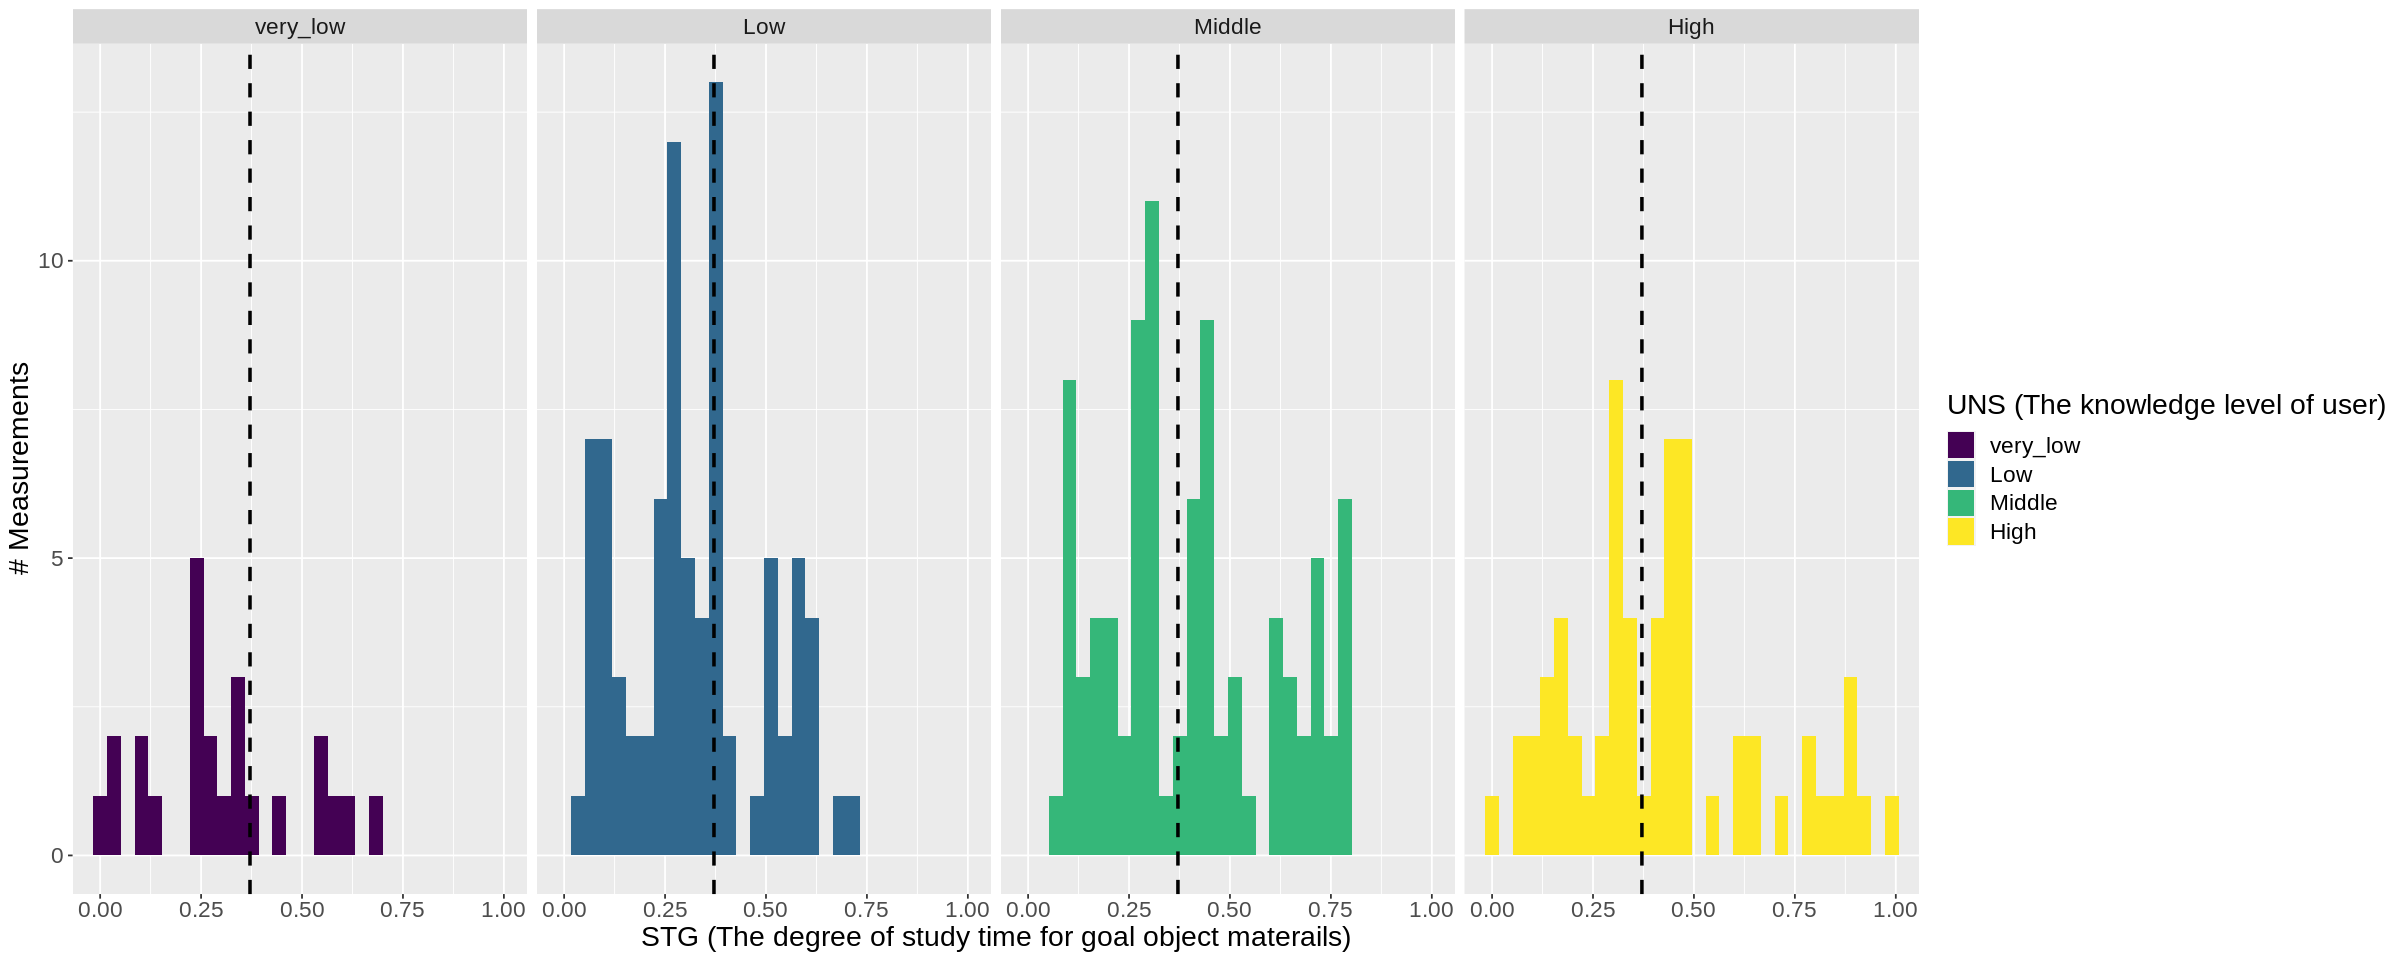

In [7]:
# The distribution of STG
options(repr.plot.width = 20, repr.plot.height = 8) 
STG_distribution <- user_train |>
    ggplot(aes(x = STG, fill = UNS)) + 
    geom_histogram() +
    facet_grid(cols = vars(UNS)) +
    geom_vline(xintercept = 0.3711473, linetype = "dashed", size = 1.0) +
    labs(x = "STG (The degree of study time for goal object materails)", 
         y = "# Measurements", 
         fill = "UNS (The knowledge level of user)") +
  theme(text = element_text(size = 17))
STG_distribution

Within the very_low values, there’s a very small number of measurements that are above average whereas there are many measurements below average.
For users with a low knowledge level, there are significantly more measurements that are below average in comparison to those that are above average.
For the middle knowledge level, there are slightly more measurements that are below average in comparison to those that are above average.
Within the high knowledge level values, there are about the same amount of measurements that are below average in comparison to those that are above average.
According to these observations, we can see correlation between this predictor and user knowledge therefore it makes sense to use it as a predictor.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



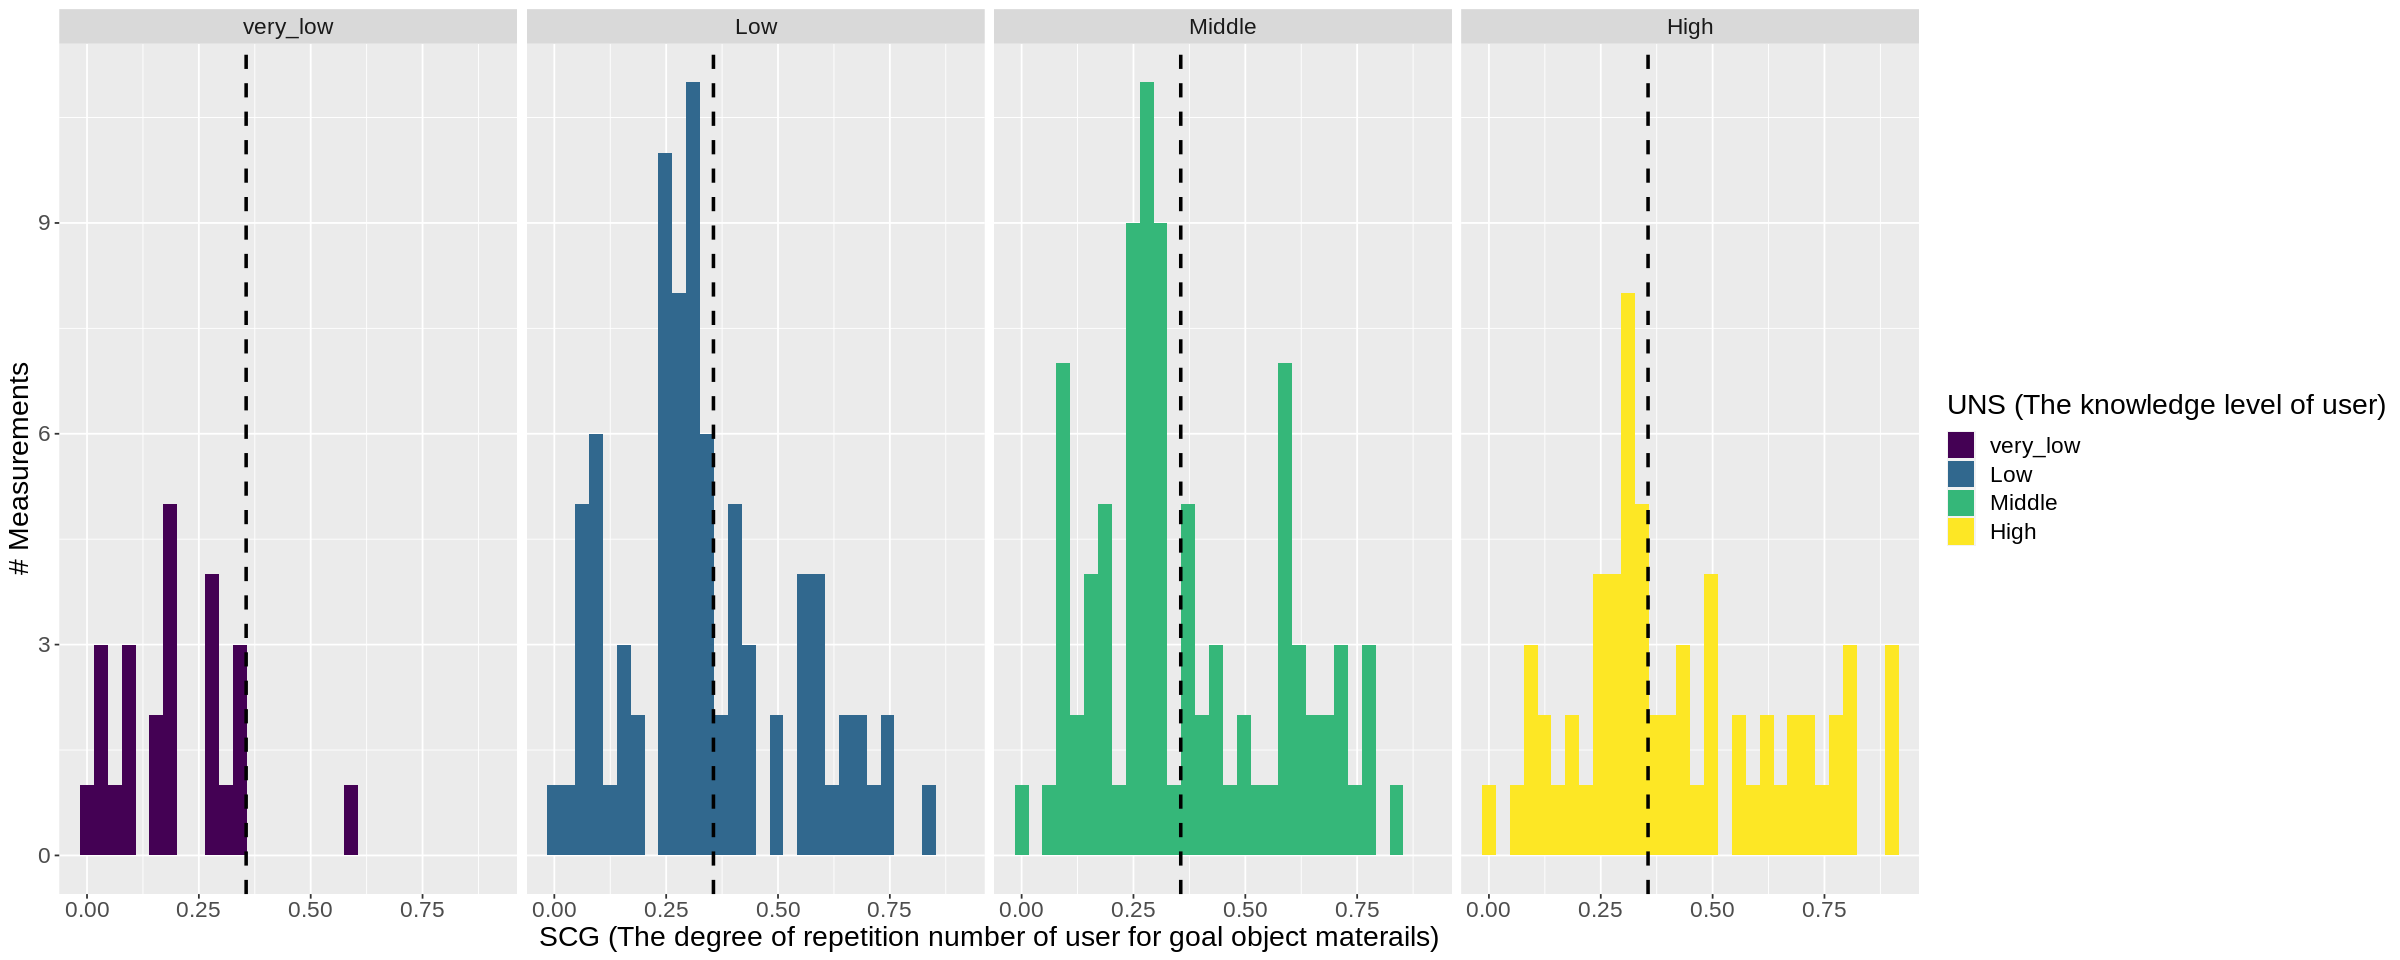

In [8]:
# The distribution of SCG
options(repr.plot.width = 20, repr.plot.height = 8) 
SCG_distribution <- user_train |>
    ggplot(aes(x = SCG, fill = UNS)) + 
    geom_histogram() +
    facet_grid(cols = vars(UNS)) +
    geom_vline(xintercept = 0.3556744, linetype = "dashed", size = 1.0) +
    labs(x = "SCG (The degree of repetition number of user for goal object materails)", 
         y = "# Measurements", 
         fill = "UNS (The knowledge level of user)") +
  theme(text = element_text(size = 17))
SCG_distribution

For users with a very_low knowledge level, there are far more measurements that are below average (almost entirely) than those below average. Within the low measurements, there are significantly more measurements that are below average in comparison to those that are above average. For the middle knowledge level, there are quite a bit more measurements that are below average in ratio to those that are above average. Within the high knowledge level values, there are slightly more measurements that are below average in comparison to those that are above average. According to these observations, we can see correlation between this predictor and user knowledge therefore it makes sense to use it as a predictor.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



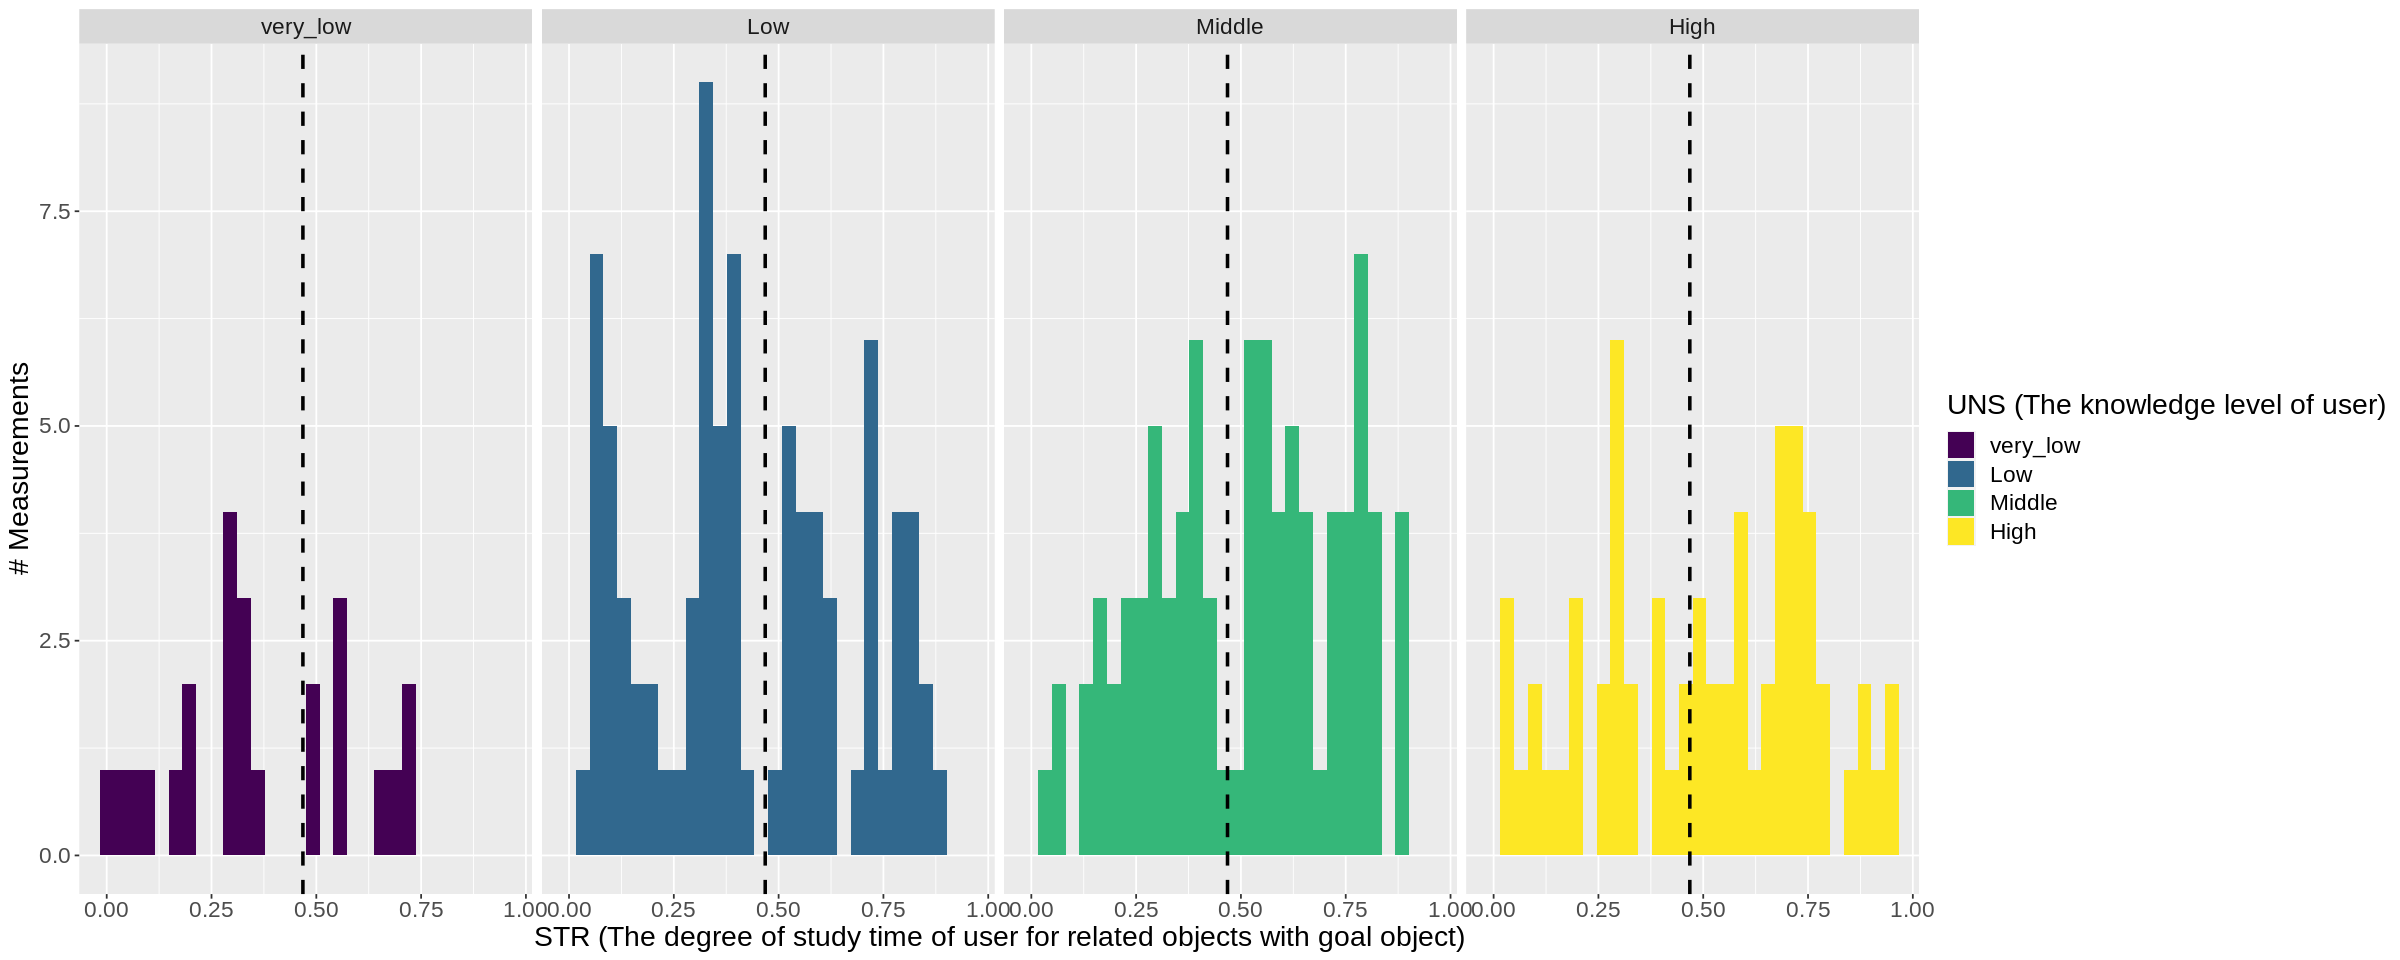

In [9]:
# The distribution of STR
options(repr.plot.width = 20, repr.plot.height = 8) 
STR_distribution <- user_train |>
    ggplot(aes(x = STR, fill = UNS)) + 
    geom_histogram() +
    facet_grid(cols = vars(UNS)) +
    geom_vline(xintercept = 0.4680039, linetype = "dashed", size = 1.0) +
    labs(x = "STR (The degree of study time of user for related objects with goal object)", 
         y = "# Measurements", 
         fill = "UNS (The knowledge level of user)") +
  theme(text = element_text(size = 17))
STR_distribution

Within the very_low knowledge level values, there are around the same number of measurements that are below average than those below average.For users with a low knowledge level, there are significantly more measurements that are below average in comparison to those that are above average. Within the middle knowledge level measurements, there are slightly more measurements that are above average in ratio to those that are below average. For the high knowledge level, there are about the same amount of measurements that are below average in comparison to those that are above average. According to these observations, we don’t see any correlation between this predictor and user knowledge therefore we will not be using it as a predictor.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



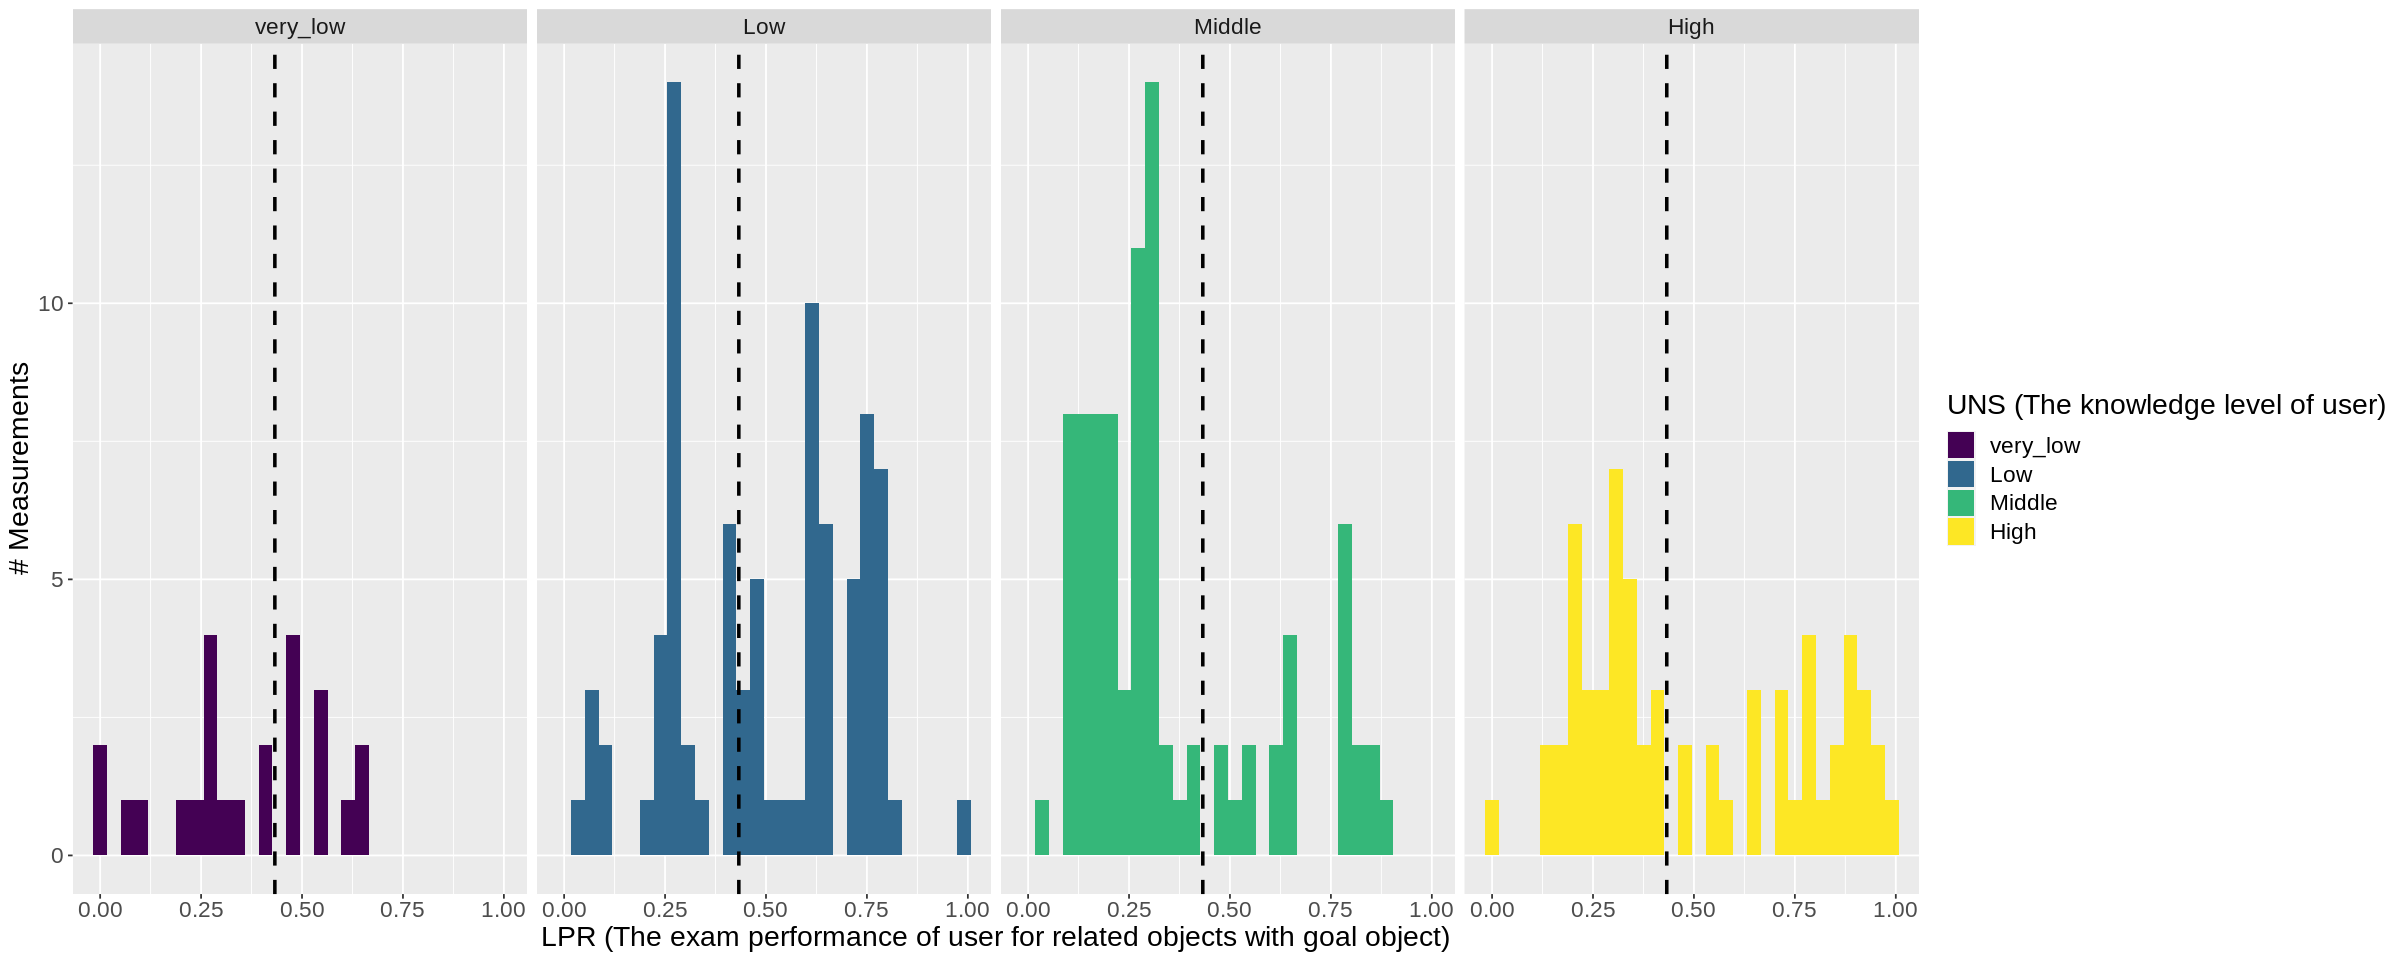

In [10]:
# The distribution of LPR
options(repr.plot.width = 20, repr.plot.height = 8) 
LPR_distribution <- user_train |>
    ggplot(aes(x = LPR, fill = UNS)) + 
    geom_histogram() +
    facet_grid(cols = vars(UNS)) +
    geom_vline(xintercept = 0.4327132, linetype = "dashed", size = 1.0) +
    labs(x = "LPR (The exam performance of user for related objects with goal object)", 
         y = "# Measurements", 
         fill = "UNS (The knowledge level of user)") +
  theme(text = element_text(size = 17))
LPR_distribution

For users with a very_low knowledge level, there are around the same number of measurements that are below average than those below average. For users with a low knowledge level, there are slightly more measurements that are below average in comparison to those that are above average. Within the middle knowledge level measurements, there are far more measurements that are below average in ratio to those that are above average. Similarly to users with a low knowledge level, for the high knowledge level, there are slightly more measurements that are below average in comparison to those that are above average. According to these observations, we can see correlation between this predictor and user knowledge therefore it makes sense to use it as a predictor.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



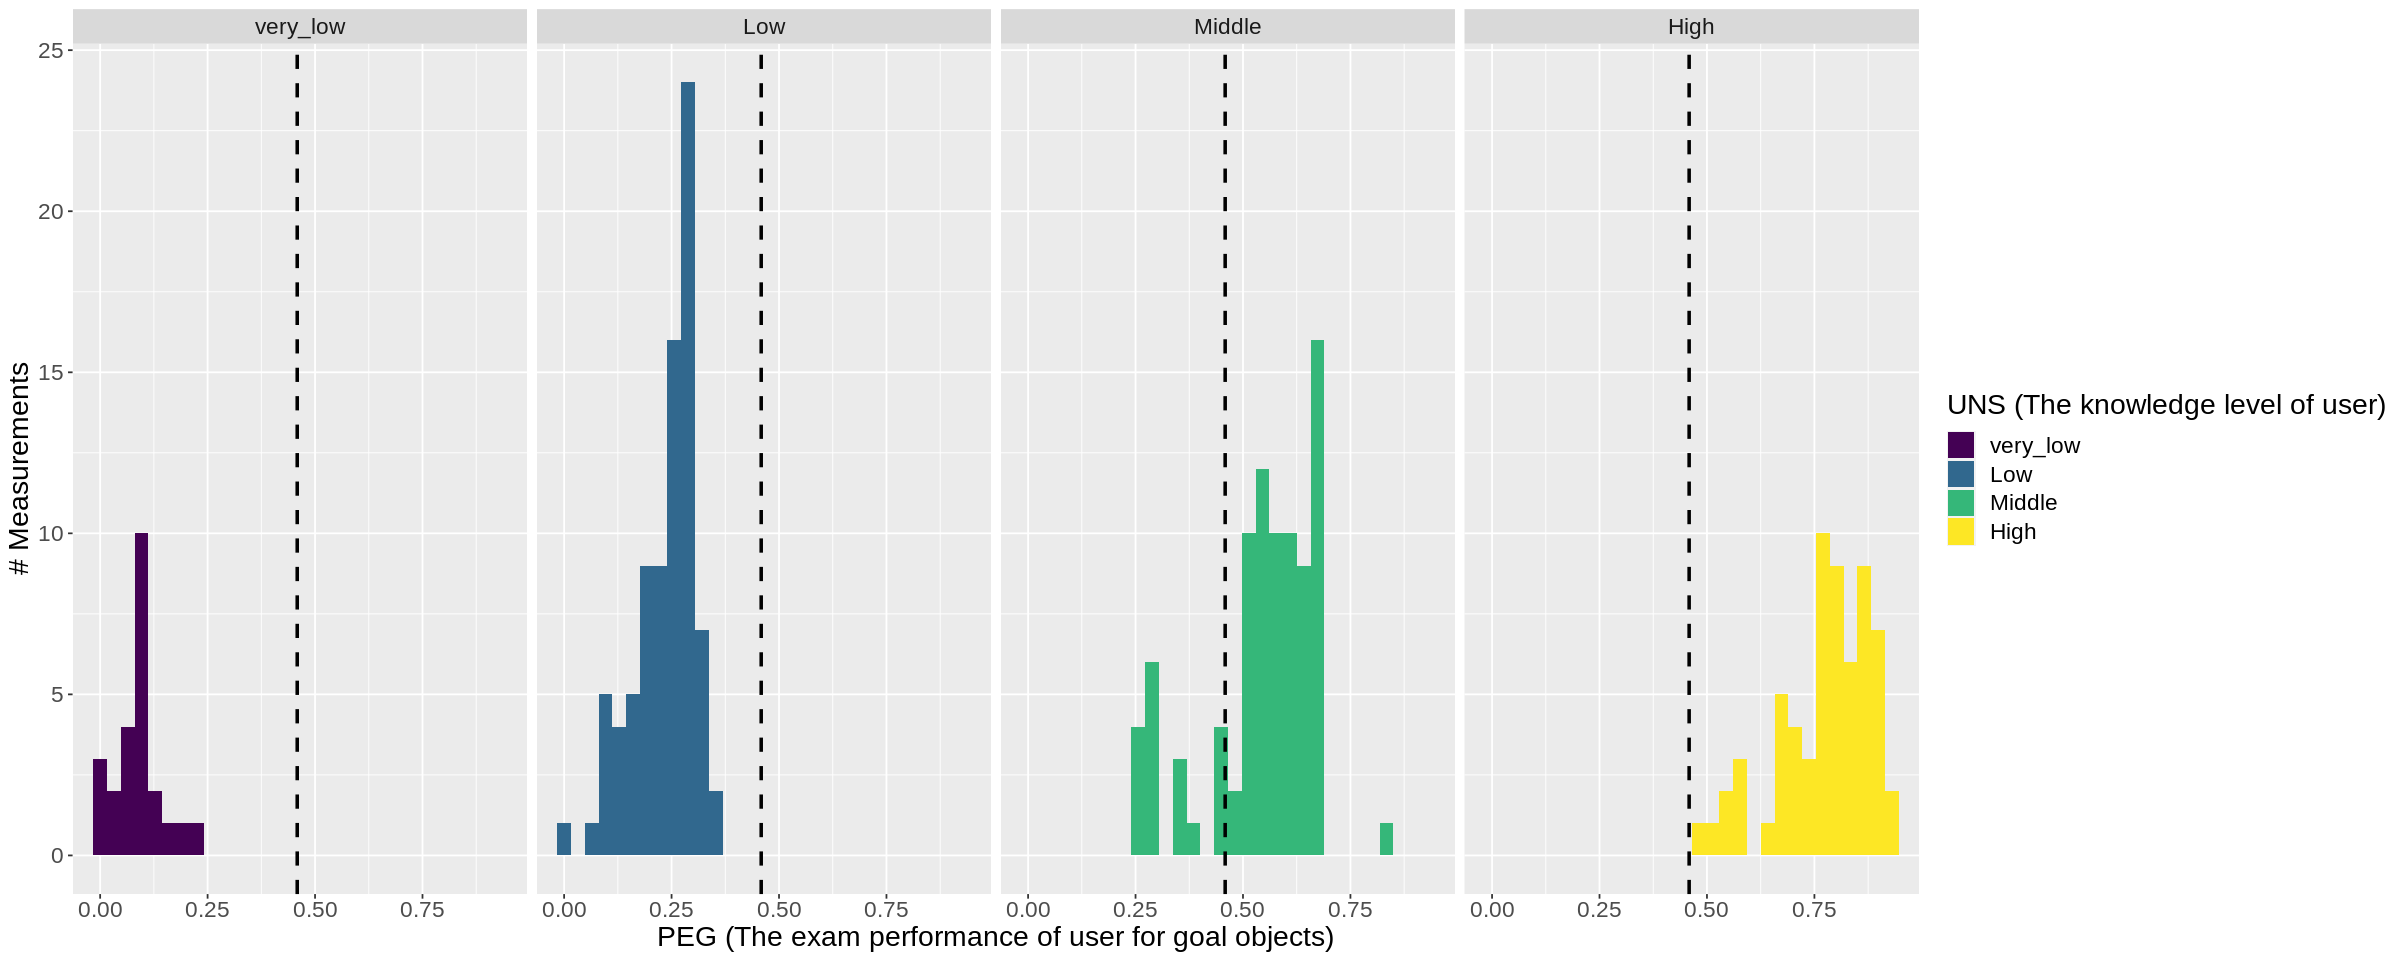

In [11]:
# The distribution of PEG
options(repr.plot.width = 20, repr.plot.height = 8) 
PEG_distribution <- user_train |>
    ggplot(aes(x = PEG, fill = UNS)) + 
    geom_histogram() +
    facet_grid(cols = vars(UNS)) +
    geom_vline(xintercept = 0.4585388, linetype = "dashed", size = 1.0) +
    labs(x = "PEG (The exam performance of user for goal objects)", 
         y = "# Measurements", 
         fill = "UNS (The knowledge level of user)") +
  theme(text = element_text(size = 17))
PEG_distribution

Within the very_low values, all of the measurements are below average as there are no measurements that are above average. Very few measurements are observed overall. Similarly, for users with a low knowledge level, there are only measurements that are below average and no measurements that are above average. For the middle knowledge level, there are significantly more measurements that are above average in comparison to those that are below average. Within the high knowledge level values, all of the measurements are above average. According to these observations, we can see correlation between this predictor and user knowledge therefore it makes sense to use it as a predictor.

From our analysis above, we chose to include only 4/5 of the predictors into our model. This was done purely by analyzing the dataset and their realtionship to UNS (the variable we are predicting for), as opposed to other methods of variable selection, such as forward selection. Our reasoning for doing so is described below:

Even though the K-nearest neighbors algorithm accepts any number of predictors, irrelevant predictors can negatively affect the accuracy of our classifier and the performance of the model. Typically, in a classification data analysis project, some predictor variable selection algorithm such as forward selection is implemented to select the best subsets of predictors for optimal accuracy of the model. However, whether it is necessary to perform a predictor selection depends on the characteristics of the data set. With serious consideration, we decided not to perform the predictor selection. The reasons are listed below:

- Predictor selection works well with datasets containing a large number of variables that potentially, thus allowing for irrelevant variables to be filtered out. However, our dataset contains only 5 potential predictors, ensuring that we will not encounter the issue of dimensionality such as slow processing time and noisy fluctuation, which occurs when there is a large number of predictors. At the same time, based on our prior knowledge about the dataset, we can say that all 5 predictors are relevant to the datasets. As students ourselves, we know that exam scores and study time do have an influence on an individual’s knowledge, and thus we can say that all 5 potential predictors are informative and relevant to the categorical label we want to provide. Therefore, we are confident that including all variables as potential predictors will lead to improved accuracy and better generalizability for the model.

- The implementation of the forward selection requires us to tune the KNN classifier for every subset of the predictors given the best parameter K. However, the optimal K is dependent on which subset of predictors we use in the recipe. Therefore, prioritizing variable selection over parameter selection again depends on the characteristics of the data set. Since, as mentioned earlier, our dataset is relatively small and not complex in terms of the size of observations and numbers of predictors variables, we should prioritize our parameter selection, because it more greatly impacts the performance of the model compared to predictor selection.

- Both predictor selection and parameter selection are computationally expensive to perform. Knowing the implementation of the predictor selection, it may not be effective in improving our model performance. Again, it would be better if we prioritize parameter selection over the predictor selection.

Because we are not using forward selection to choose our predictors, we instead examined the graphs produced in our preliminary analysis of the data set in order to determine which predictions demonstrate a stronger correlation with user knowledge. As seen above, we will selected those who demonstrate this relationship to be used as predictors in our model.

In [18]:
set.seed(102)
# Create a 5-fold cross validation object
user_vfold <- vfold_cv(user_train, v = 5, strata = UNS)

# Create a recipe for the training set and standardize the data
user_recipe <- recipe(UNS ~ PEG, SCG, STG, LPR, data = user_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

# Create a knn model specification
 knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
     set_engine("kknn") |>
     set_mode("classification")

# Fit the knn model into a workflow with a range of possible K values
 k_vals <- tibble(neighbors = seq (from = 1, to = 40))
                
knn_results <- workflow() |>
    add_recipe(user_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = user_vfold, grid = k_vals) |>
    collect_metrics() |>
    filter(.metric == "accuracy")
head(knn_results)

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.7596923,5,0.03070917,Preprocessor1_Model01
2,accuracy,multiclass,0.7753846,5,0.02721273,Preprocessor1_Model02
3,accuracy,multiclass,0.7673846,5,0.01619519,Preprocessor1_Model03
4,accuracy,multiclass,0.8061538,5,0.02198036,Preprocessor1_Model04
5,accuracy,multiclass,0.7901538,5,0.02936548,Preprocessor1_Model05
6,accuracy,multiclass,0.8252308,5,0.02271954,Preprocessor1_Model06


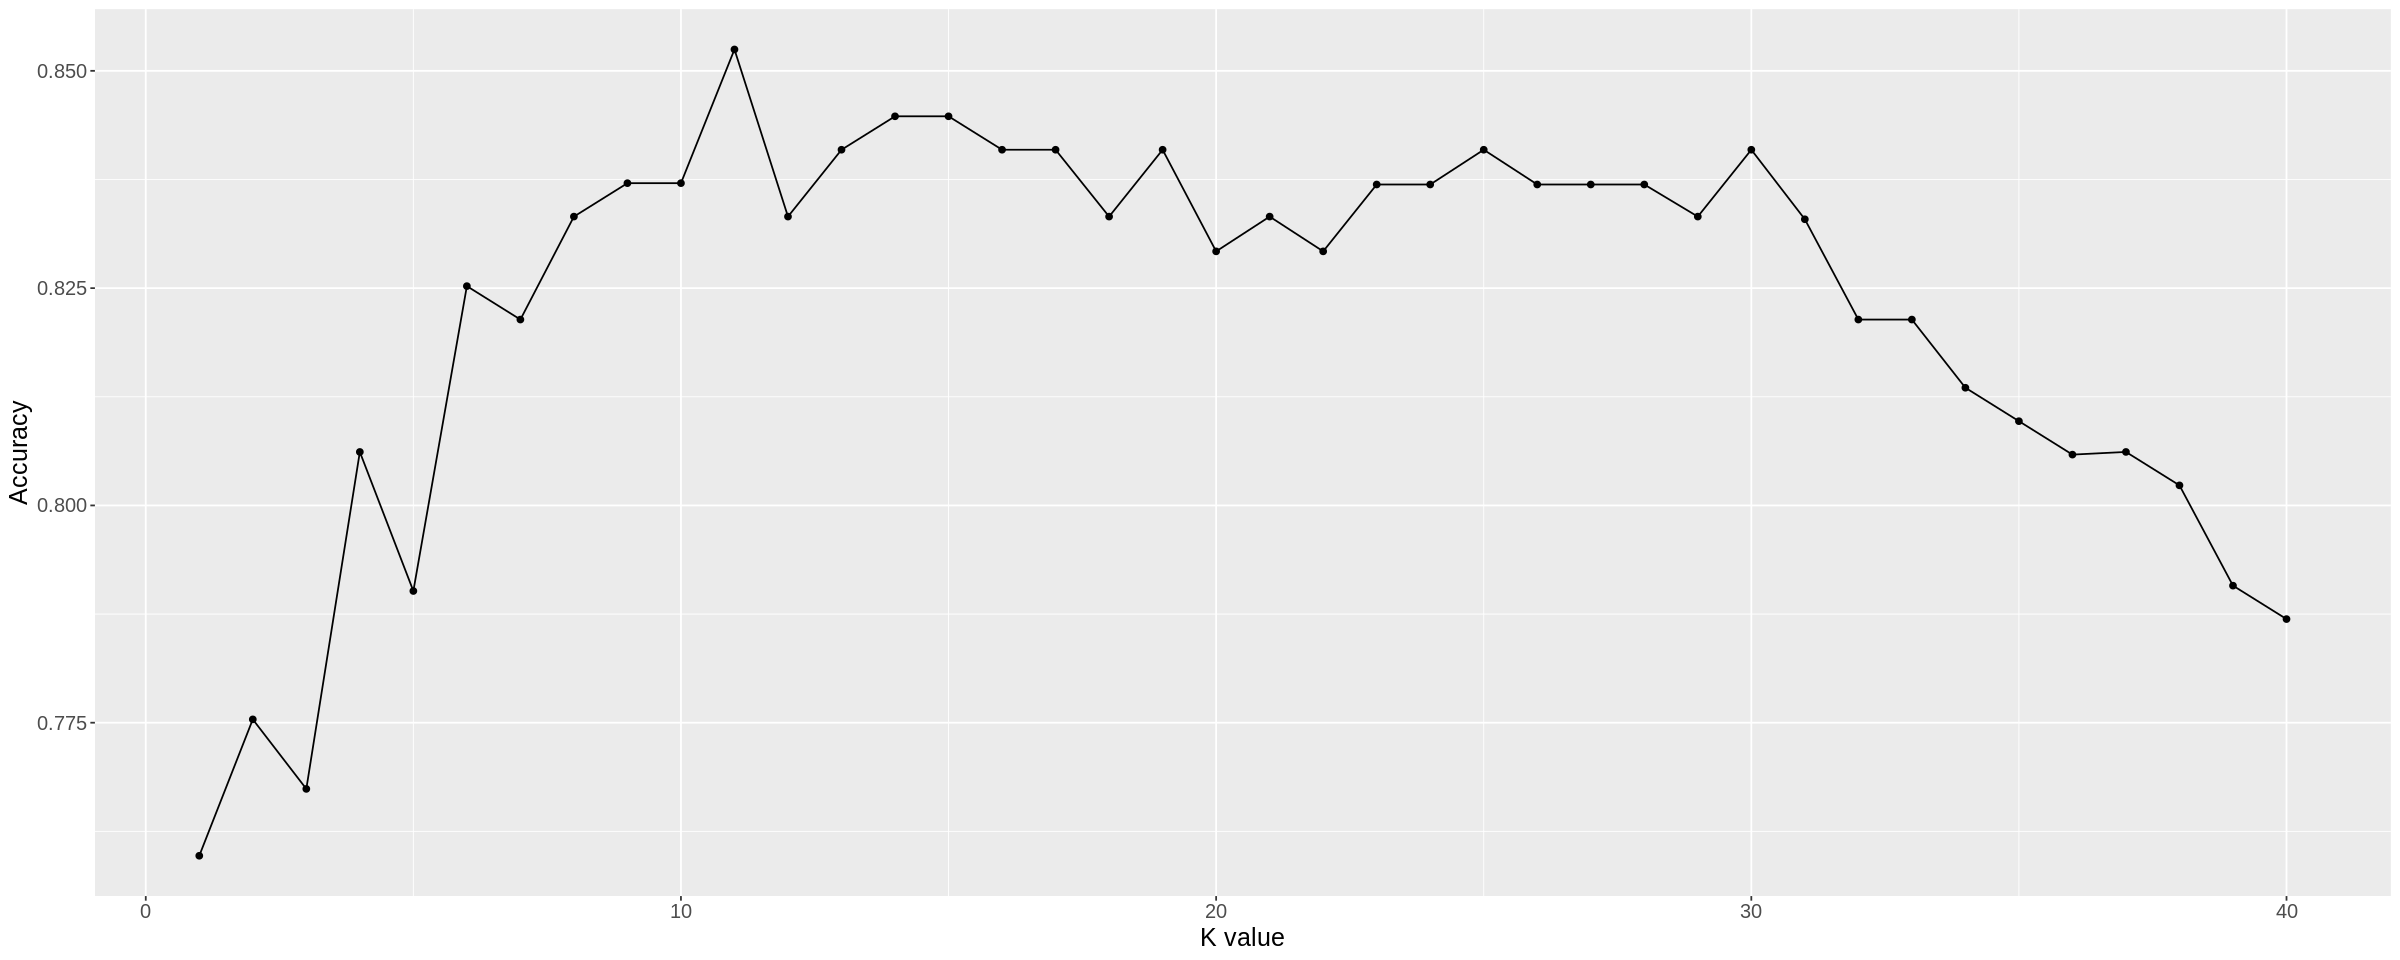

In [13]:
# plot for K value accuracy
set.seed(102)
accuracies_plot <- knn_results |>
    ggplot( aes (y=mean, x=neighbors)) +
    geom_point() +
    geom_line () +
    labs (x= "K value", y= "Accuracy") +
    theme(text = element_text(size = 15))

accuracies_plot

From the graph, we can see that the optimal K value is 11, as it has the highest accuracy. Moreover, changing K to nearby values does not dramatically change accuracy, meaning that chooseing K = 11 is reliable.
We did not evaluate for values beyond 40 because from K = 30 and onwards, the accuracy continues to drecreases, and thus we can expect that an optimal K value will not be greater than 30. 

In [14]:
#Obtaining most accurate K 
set.seed(102)
knn_accuracy <- knn_results |>
    select(neighbors, mean) |>
    arrange(desc(mean)) |>
    slice(1)

knn_accuracy

neighbors,mean
<int>,<dbl>
11,0.8524615


Now that we have selected the most accurate K value, we will evaluate the accuracy of the chosen K against our test data.

In [15]:
set.seed(102)

# Assign the chosen K value to an object 
k_min <- knn_accuracy |>
     pull(neighbors)

# Create a knn model specification 
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) |>
  set_engine("kknn") |>
  set_mode("classification")

# Fit the knn model into a workflow 
knn_fit <- workflow() |>
  add_recipe(user_recipe) |>
  add_model(knn_spec) |>
  fit(data = user_train)

# Evaluate the accuracy of the chosen K 
user_prediction <- knn_fit |>
   predict(user_test) |>
   bind_cols(user_test) 
head(user_prediction)
tail(user_prediction)

accuracy <- user_prediction |>
    metrics(truth = UNS, estimate = .pred_class) |>
    filter(.metric == "accuracy")
accuracy

.pred_class,STG,SCG,STR,LPR,PEG,UNS
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
very_low,0.00,0.10,0.50,0.26,0.05,very_low
very_low,0.16,0.25,0.01,0.10,0.07,very_low
very_low,0.18,0.26,0.05,0.40,0.04,very_low
very_low,0.10,0.27,0.35,0.45,0.05,very_low
very_low,0.00,0.25,0.50,0.09,0.07,very_low
very_low,0.20,0.25,0.70,0.25,0.03,very_low


.pred_class,STG,SCG,STR,LPR,PEG,UNS
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Low,0.68,0.61,0.34,0.31,0.23,Low
High,0.90,0.78,0.62,0.32,0.89,High
High,0.85,0.82,0.66,0.83,0.83,High
Low,0.56,0.60,0.77,0.13,0.32,Low
Middle,0.66,0.68,0.81,0.57,0.57,Middle
Low,0.68,0.64,0.79,0.97,0.24,Middle


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.8689655


We can see that our classifier has an accuracy of 86.9%. Let's  create a histogram of the user_prediction datatable to visually compare the number of predictions to true observations for each label.

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


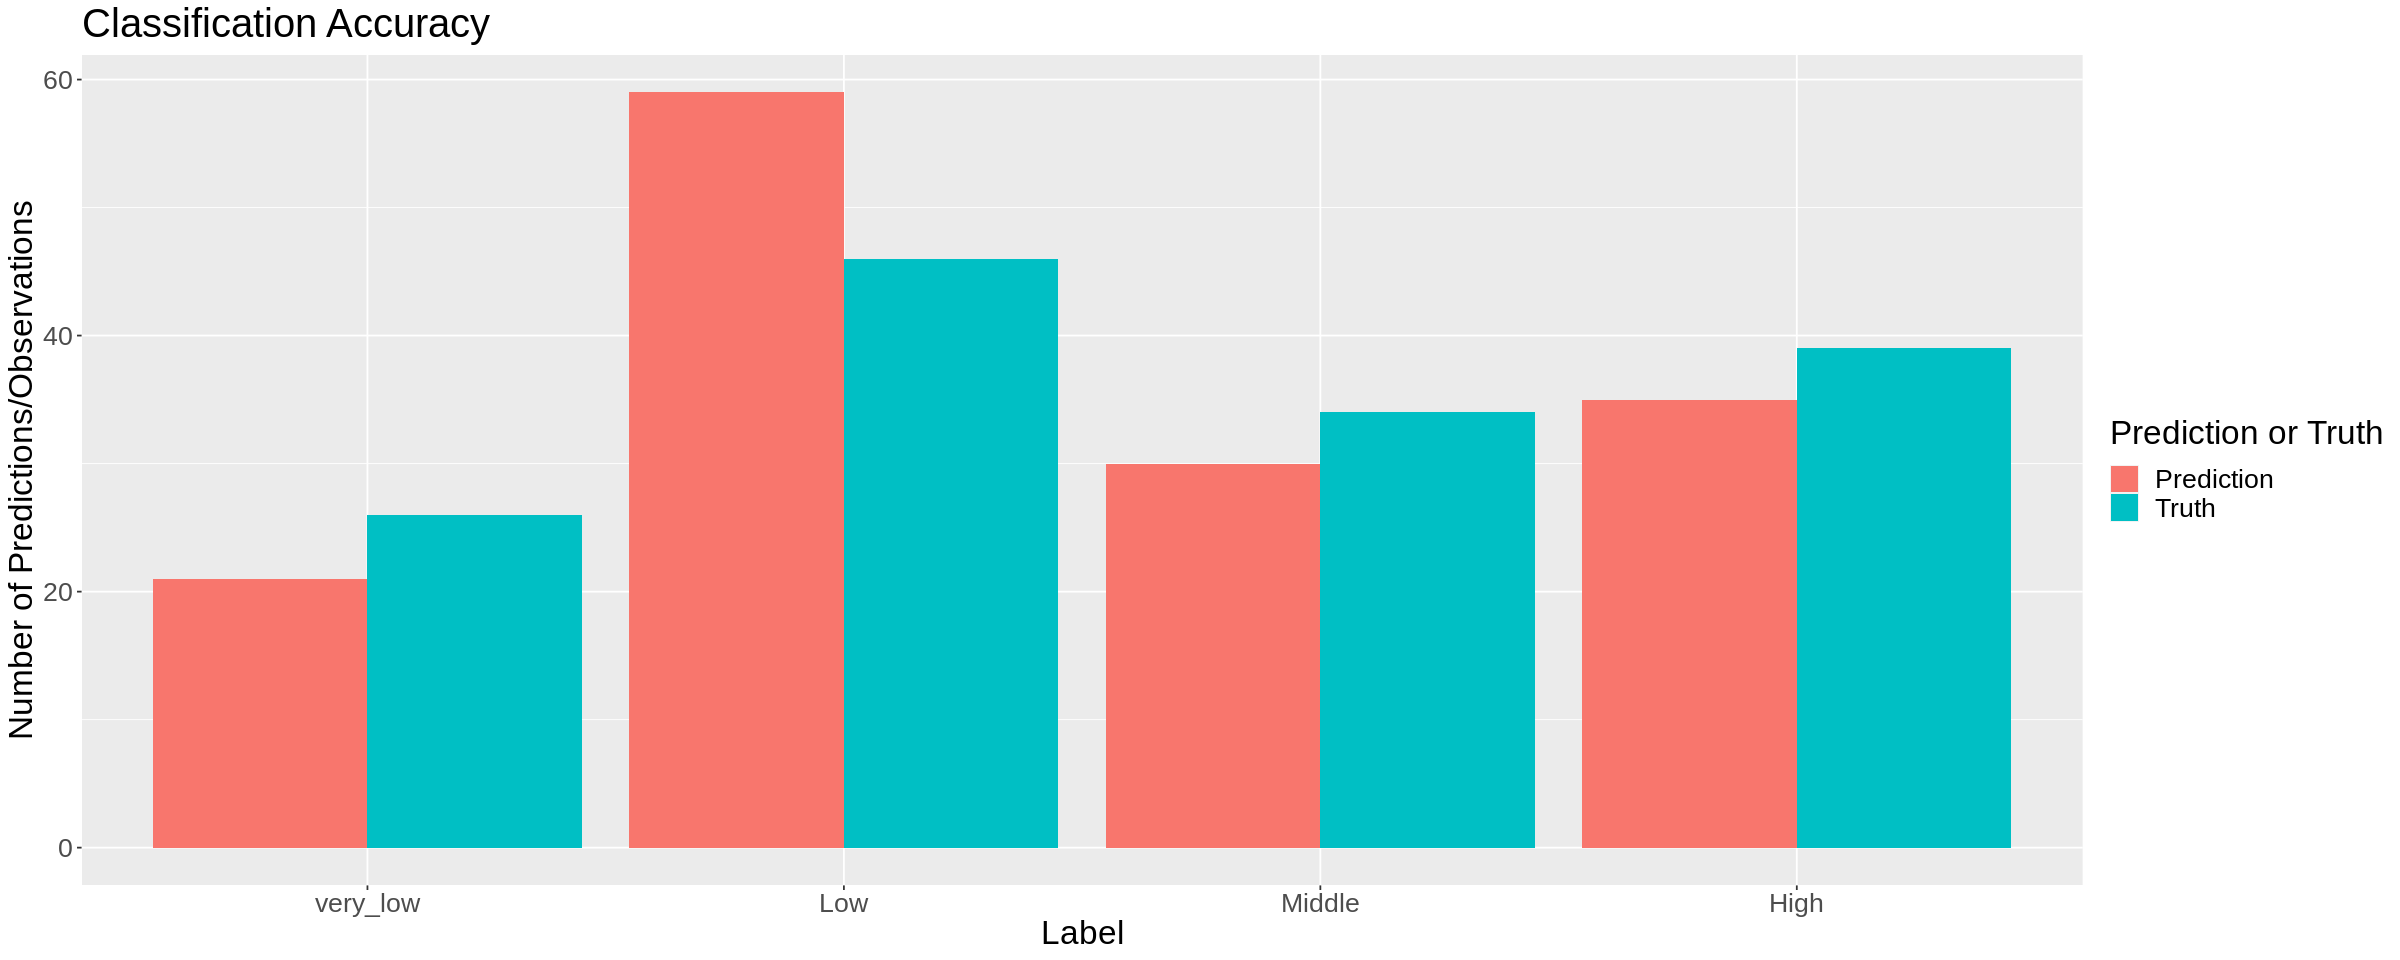

In [16]:
# Load the library that allows us to change
library(RColorBrewer)

# Create a histogram to compare the number of predicted labels to true labels.
accuracy_plot<-user_prediction|>
    pivot_longer(col = c(UNS, .pred_class), names_to = "type", values_to = "label") |>
    ggplot(aes(x=label, fill =type)) +
    geom_histogram(stat="count", position="dodge") +
    labs(x="Label", y="Number of Predictions/Observations", fill="Prediction or Truth") +
    theme(text=element_text(size=20)) + 
    ggtitle("Classification Accuracy") +
    scale_fill_discrete(labels = c("Prediction", "Truth"))
          

accuracy_plot

From the above graph, we can see that the number of predictions compared to the actual number of true observations for each label is quite close, meaning our classifier is fairly accurate. The most unnaccurate predictions were in the Low category, as our classifier predicted more low labels then there actually was. The graph above is good for comparing the number of predictions to number of true observations in each label, but it makes it difficult for us to see how many wrong predictions were made, and for which label. For more exact numbers, we can create a confusion matrix and plot the results.

          Truth
Prediction very_low Low Middle High
  very_low       21   0      0    0
  Low             5  45      9    0
  Middle          0   1     25    4
  High            0   0      0   35

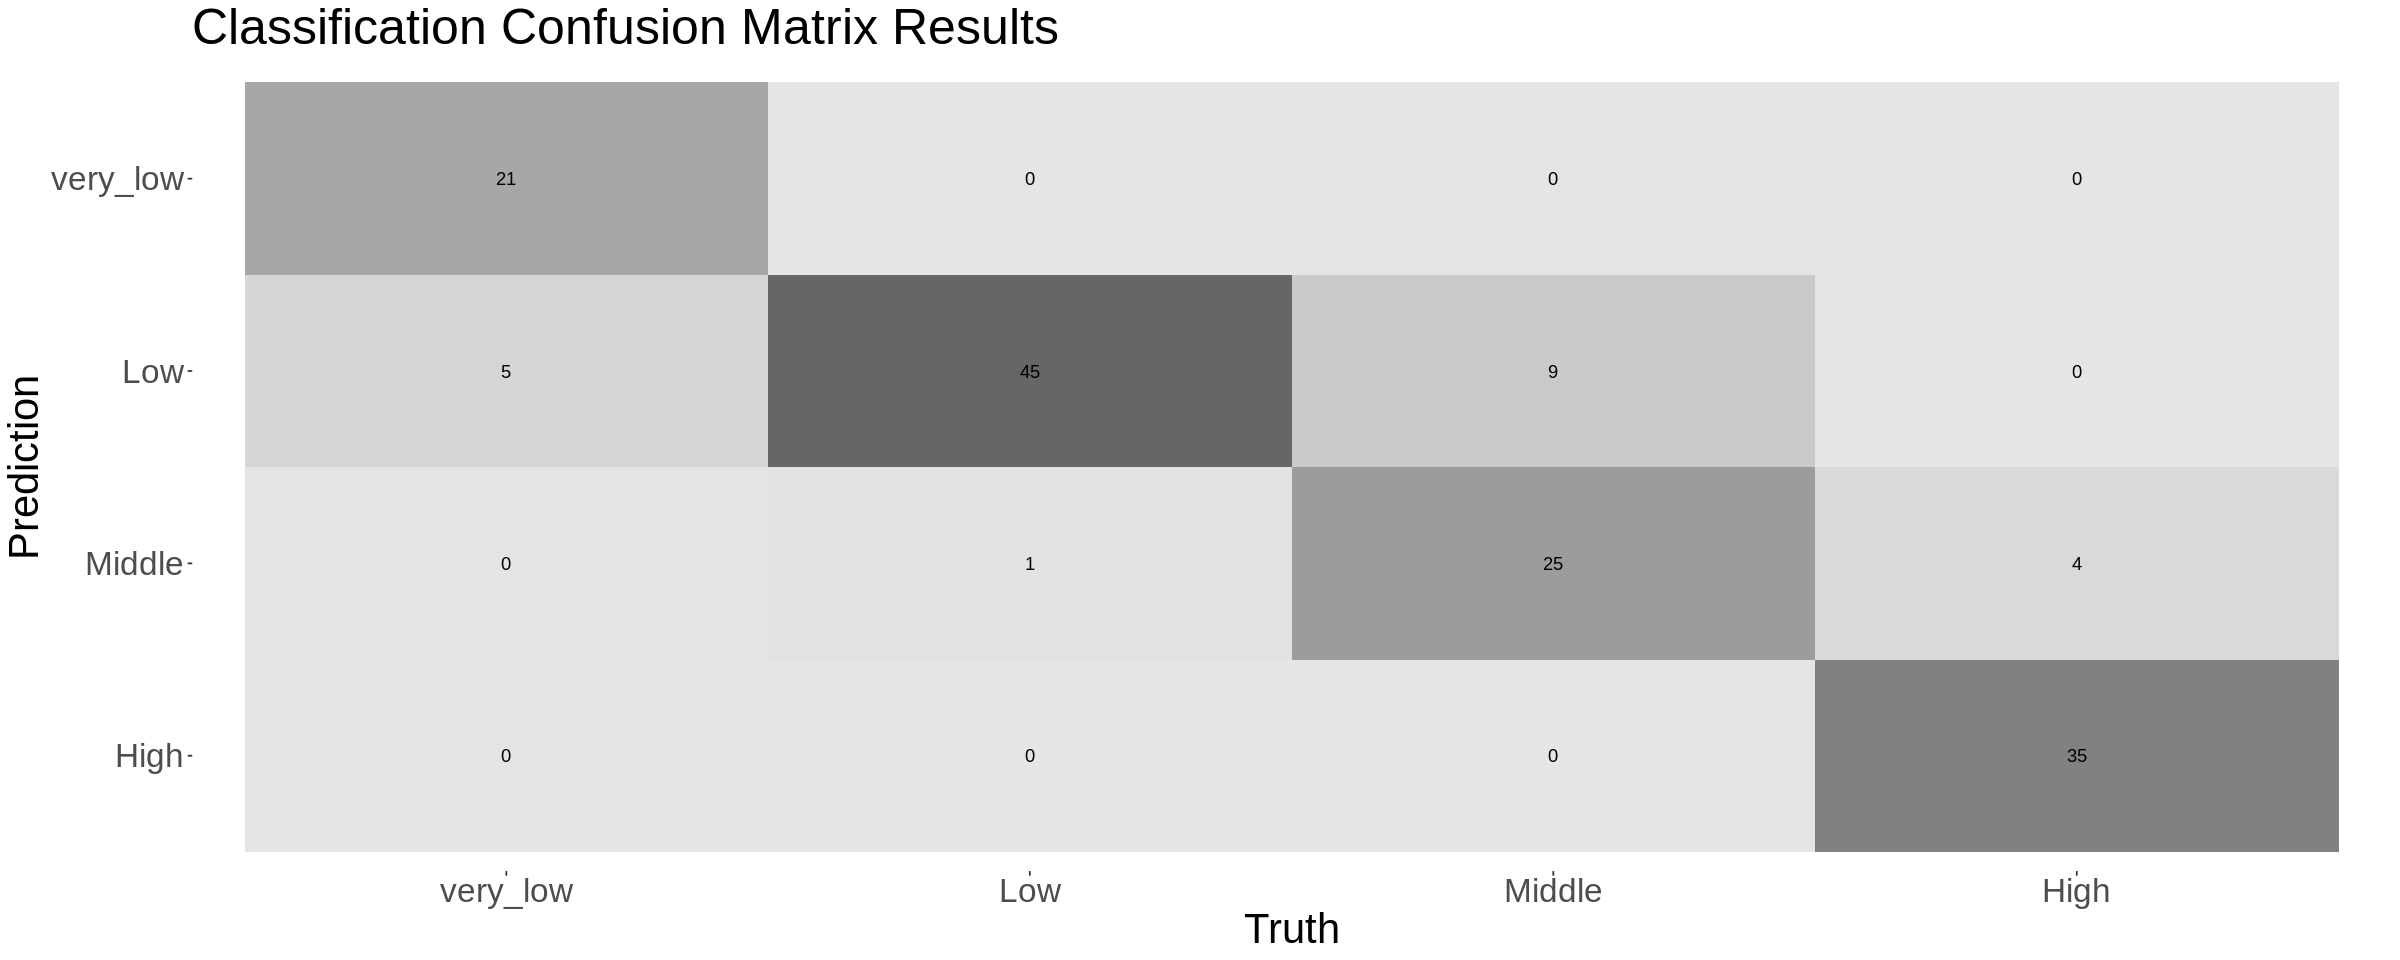

In [19]:
# Create confusion matrix
conf_mat <- user_prediction |>
    conf_mat(truth = UNS, estimate = .pred_class)
conf_mat

# Plot the results of our confusion matrix
conf_mat_plot<-autoplot(conf_mat, type="heatmap", Truth="") + 
    theme(text=element_text(size=25))+
    ggtitle("Classification Confusion Matrix Results")

conf_mat_plot

As we saw with our histogram from above, the most unnacurate predictions were in the Low category. But now, we can precisely see that the classifier wrongly predicted Low 9 times when it was actually middle, and 5 times when it should have been Very Low. Hence, in our histogram, we see more predicted Low labels than the true number of Low observations. However, despite some innacurate predictions, we can see that overall, our classifier is quite accurate. The darkest boxes on the plot above indicate that the majority of the time, the prediction was the same as the true label.